- Adam Napora
- 18197892

## Etivity 2: Task 2, Q-Learning & SARSA direct comparison

In this Notebook I will gather the final results for **Q-Learning** and **SARSA** algorithms and I will run some basic analysis to decide which method should be chosen for the **Windy Grid World** problem.

For both: Q-Learning and Sarsa algorithms, here are the parameters, which showed the best results:

$\alpha=0.1,\gamma=0.99,\epsilon=0.1$

These have been studied in more detail in the other 2 Notebooks.

In [115]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [116]:
# Import necessary libraries
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Load results

Load dictionaries for each alogirthm generated for Windy Grid World problem and stored as pickles.

In [117]:
q_decay_results = pickle.load(open("q_with_decay_results.pickle", "rb"))
q_no_decay_results = pickle.load(open("q_no_decay_results.pickle", "rb"))

In [118]:
sarsa_decay_results = pickle.load(open("sarsa_with_decay_results.pickle", "rb"))
sarsa_no_decay_results = pickle.load(open("sarsa_no_decay_results.pickle", "rb"))

### Compare Q-Learning and Sarsa basic models (without exponential decay)

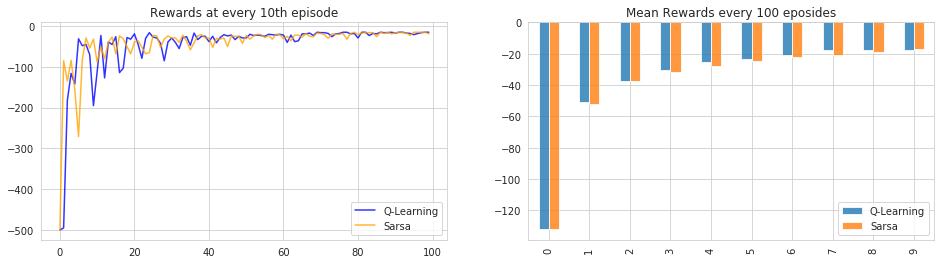

In [110]:
#Let's only take a look at every 10th episode, otherwise plots look really cluttered
q_rewards = [r for i, r in enumerate(q_no_decay_results['rewards']) if i % 10 == 0]
sarsa_rewards = [r for i, r in enumerate(sarsa_no_decay_results['rewards']) if i % 10 == 0]
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(4)
f.set_figwidth(16)
ax1.plot(q_rewards, c='blue', alpha=0.8, label='Q-Learning')
ax1.plot(sarsa_rewards, c='orange', alpha=0.8, label='Sarsa')
ax1.set_title('Rewards at every 10th episode')
ax1.legend()

# plot Mean Rewards for each 100 episodes as well
q_res = [np.mean(q_no_decay_results['rewards'][i:i+100]) for i in range(1000) if i % 100 == 0]
s_res = [np.mean(sarsa_no_decay_results['rewards'][i:i+100]) for i in range(1000) if i % 100 == 0]
pd.DataFrame({'Q-Learning': q_res, 'Sarsa': s_res}).plot(kind='bar', 
    ax=ax2, title='Mean Rewards every 100 eposides', alpha=0.8);

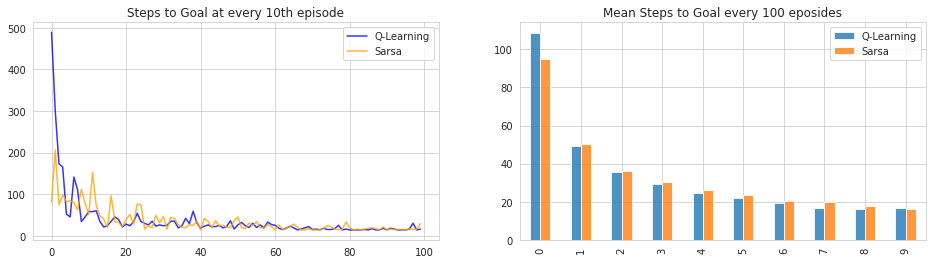

In [111]:
q_steps = [r for i, r in enumerate(q_no_decay_results['goal_steps']) if i % 10 == 0]
sarsa_steps = [r for i, r in enumerate(sarsa_no_decay_results['goal_steps']) if i % 10 == 0]
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(4)
f.set_figwidth(16)
ax1.plot(q_steps, c='blue', alpha=0.8, label='Q-Learning')
ax1.plot(sarsa_steps, c='orange', alpha=0.8, label='Sarsa')
ax1.set_title('Steps to Goal at every 10th episode')
ax1.legend()

q_res = [np.mean(q_no_decay_results['goal_steps'][i:i+100]) for i in range(1000) if i % 100 == 0]
s_res = [np.mean(sarsa_no_decay_results['goal_steps'][i:i+100]) for i in range(1000) if i % 100 == 0]
pd.DataFrame({'Q-Learning': q_res, 'Sarsa': s_res}).plot(kind='bar', ax=ax2, 
    title='Mean Steps to Goal every 100 eposides', alpha=0.8);

#### Comments:

- For the Rewards, the higher the number, the better, and for the Number of steps to reach the goal, it's the other way around
- Both models perform in a similar way and both converge to a high enough Rewards and low Steps to reach the goal
- Sarsa performs slightly worse than Q-Learning, even though it has a better start (we can see a higher Reward in the first episodes)
- Overall it's difficult to clearly select a better model based on the plots above

### Compare Q-Learning and Sarsa models with exponential rate decay

**Exponential Rate Decay** is explained in the other 2 Notebooks, but in a nutshell it's a method to vary the Exponential Rate ($\epsilon$) parameter after each episode to balance the exploration vs exploitation trade-off

$\epsilon=\epsilon_{min}+(\epsilon_{max}-\epsilon_{min})*\exp^{-\epsilon_{decay}*N}$

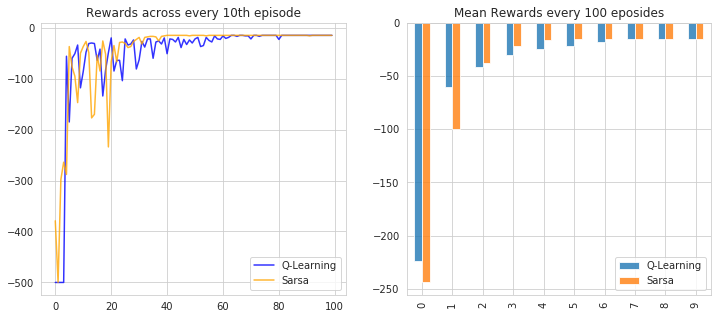

In [124]:
q_rewards = [r for i, r in enumerate(q_decay_results['rewards']) if i % 10 == 0]
sarsa_rewards = [r for i, r in enumerate(sarsa_decay_results['rewards']) if i % 10 == 0]
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(4)
f.set_figwidth(16)
ax1.plot(q_rewards, c='blue', alpha=0.8, label='Q-Learning')
ax1.plot(sarsa_rewards, c='orange', alpha=0.8, label='Sarsa')
ax1.set_title('Rewards across every 10th episode')
ax1.legend()

q_res = [np.mean(q_decay_results['rewards'][i:i+100]) for i in range(1000) if i % 100 == 0]
s_res = [np.mean(sarsa_decay_results['rewards'][i:i+100]) for i in range(1000) if i % 100 == 0]
pd.DataFrame({'Q-Learning': q_res, 'Sarsa': s_res}).plot(kind='bar', figsize=(12, 5), ax=ax2,
    title='Mean Rewards every 100 eposides', alpha=0.8);

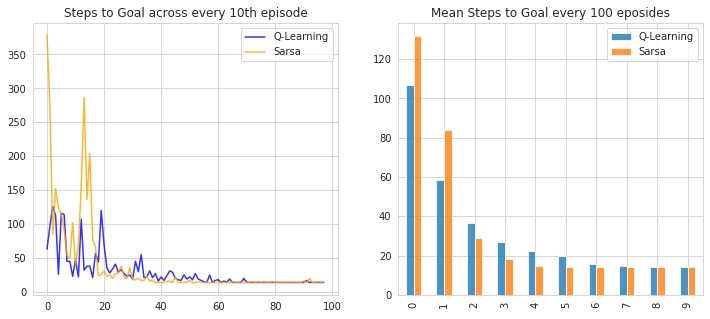

In [120]:
q_steps = [r for i, r in enumerate(q_decay_results['goal_steps']) if i % 10 == 0]
sarsa_steps = [r for i, r in enumerate(sarsa_decay_results['goal_steps']) if i % 10 == 0]
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(4)
f.set_figwidth(16)
ax1.plot(q_steps, c='blue', alpha=0.8, label='Q-Learning')
ax1.plot(sarsa_steps, c='orange', alpha=0.8, label='Sarsa')
ax1.set_title('Steps to Goal across every 10th episode')
ax1.legend()

q_res = [np.mean(q_decay_results['goal_steps'][i:i+100]) for i in range(1000) if i % 100 == 0]
s_res = [np.mean(sarsa_decay_results['goal_steps'][i:i+100]) for i in range(1000) if i % 100 == 0]
pd.DataFrame({'Q-Learning': q_res, 'Sarsa': s_res}).plot(kind='bar', figsize=(12, 5), ax=ax2,
    title='Mean Steps to Goal every 100 eposides', alpha=0.8);

#### Comment:

- After adding the Exponential Rate Decay option, Sarsa seems to be converging much faster, we can observe the Reward curve flattening after around 400 episodes, where Q-Learning needs around 700 episodes
- Similar pattern can be observed in the bottom plots for Steps to reach the Goal, Sarsa needs only around 14 steps to achieve the Goal after only 400 episodes
- Here we can say that we do have a clear winner and Sarsa performs quite a bit better